In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Memuat Dataset Diabetes

In [29]:
data = load_diabetes()
X = pd.DataFrame(data.data, columns=data.feature_names)
print(X.head())
Y = pd.Series(data.target, name='target')   
print(Y.head())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  
0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64


# Menghitung Korelasi Pearson antara Features dengan label

In [30]:
df = X.copy()
df['target'] = Y
 #hitung korelasi pearson
corr = df.corr()
print(corr['target'].abs().sort_values(ascending=False))

target    1.000000
bmi       0.586450
s5        0.565883
bp        0.441482
s4        0.430453
s3        0.394789
s6        0.382483
s1        0.212022
age       0.187889
s2        0.174054
sex       0.043062
Name: target, dtype: float64


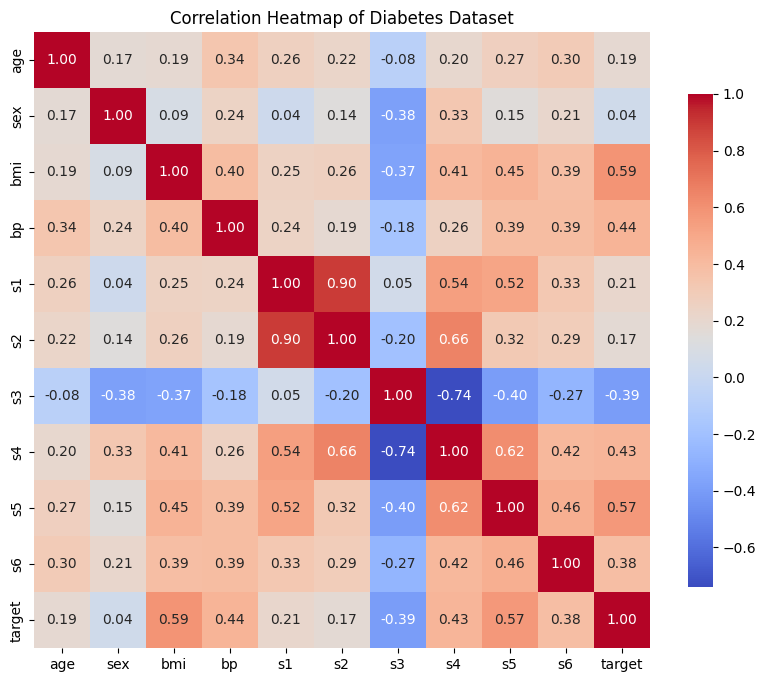

Korelasi antara fitur dan target:
target    1.000000
bmi       0.586450
s5        0.565883
bp        0.441482
s4        0.430453
s3        0.394789
s6        0.382483
s1        0.212022
age       0.187889
s2        0.174054
sex       0.043062
Name: target, dtype: float64


In [31]:
#visualisasi
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap of Diabetes Dataset')
plt.show()
print("Korelasi antara fitur dan target:")
print(corr['target'].abs().sort_values(ascending=False))

# Memilih 5 Feature Terbaik Menggunakan RFE

In [ ]:
correlation = df.corr()['target'].abs().sort_values(ascending=False)
#pilih top 5 fitur
top_features = correlation.index[1:6]
X_selected = df[top_features]

model = LogisticRegression(max_iter=10000)
rfe = RFE(estimator=model, n_features_to_select=5)
fit = rfe.fit(X_selected, Y)

selected_features = X_selected.columns[fit.support_]
print("Selected features using RFE:")
print(list(selected_features))

Selected features using RFE:
['bmi', 's5', 'bp', 's4', 's3']


# Membuat Model Prediksi & Evaluasi Performa Model

In [ ]:
# Ubah target menjadi kategori (biner) berdasarkan median
Y_binary = (Y > Y.median()).astype(int)

# Split data menjadi training dan testing set
X_train, X_test, Y_train, Y_test = train_test_split(X[selected_features], Y_binary, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=10000)

# Latih model dengan data training
model.fit(X_train, Y_train)

# Prediksi dengan data testing
Y_pred = model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy of the Logistic Regression model:", accuracy)
print("\nClassification Report:")
print(classification_report(Y_test, Y_pred))

Accuracy of the Logistic Regression model: 0.7865168539325843

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.76      0.80        49
           1       0.73      0.82      0.78        40

    accuracy                           0.79        89
   macro avg       0.79      0.79      0.79        89
weighted avg       0.79      0.79      0.79        89

